In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./adult.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50k']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df['50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

1. Histogram
2. Dot Plots
3. Bar Plots
4. Line Charts
5. Multivariate Analysis using Scatter Plots


## Data Cleaning

In [5]:
df.isna().sum().sum()

0

In [6]:
df.isnull().sum().sum()

0

In [7]:
(df.values == '?').sum()

0

## Data Transformation

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['50k'] = le.fit_transform(df['50k'])

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k             32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [12]:
df_encoded = df

for i in df.columns:
    if df[i].dtype == object:
        df_encoded[i] = le.fit_transform(df[i])    

In [13]:
df_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [14]:
data = df

## 1. Histogram

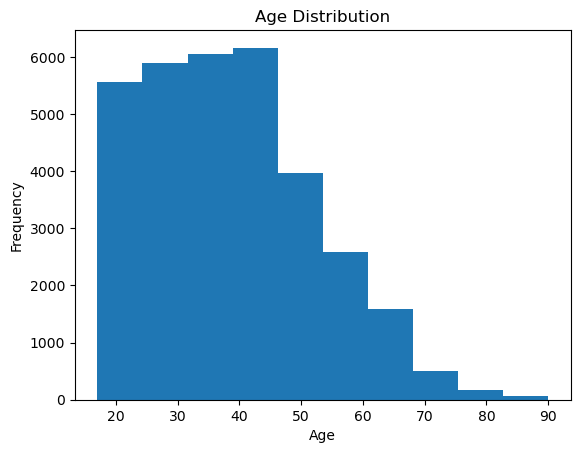

In [15]:
# Objective: Display the distribution and frequency of age using a histogram
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## 2. Dot Plot

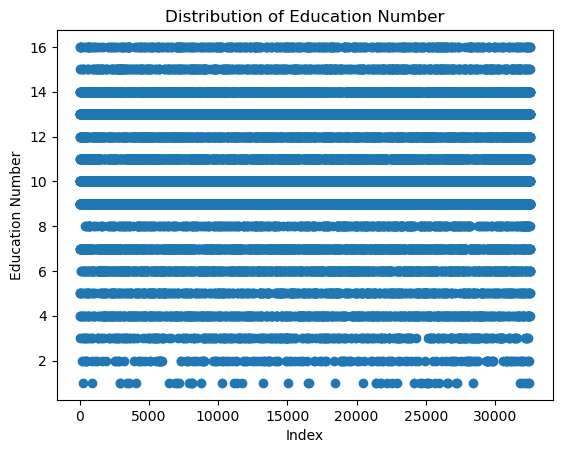

In [16]:
# Objective: Show the distribution and individual values of education-num using a dot plot
plt.plot(data['education-num'], 'o')
plt.xlabel('Index')
plt.ylabel('Education Number')
plt.title('Distribution of Education Number')
plt.show()


## 3. Bar Plot

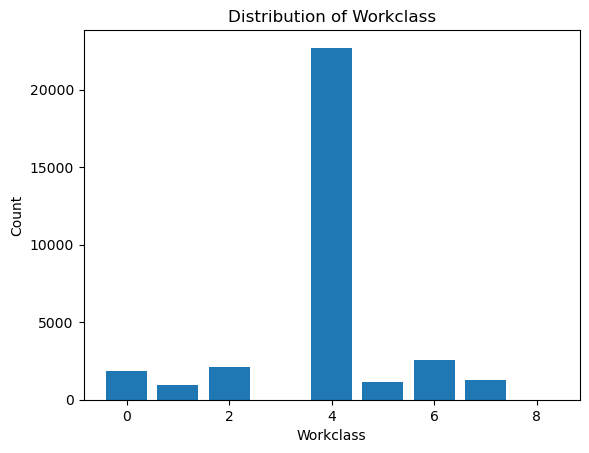

In [17]:
plt.bar(data['workclass'].value_counts().index, data['workclass'].value_counts().values)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()

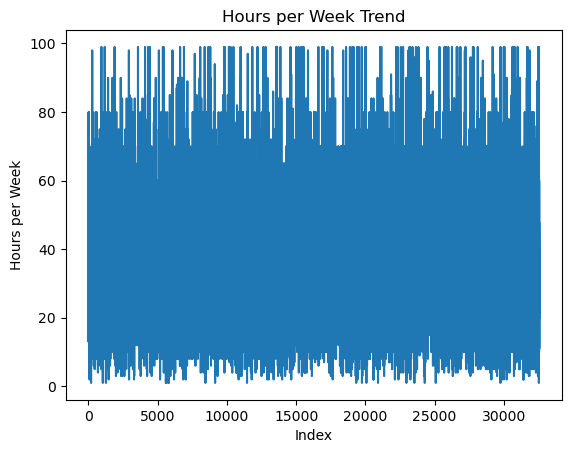

In [18]:
# Objective: Track and analyze the hours-per-week over time using a line chart
plt.plot(data['hours-per-week'])
plt.xlabel('Index')
plt.ylabel('Hours per Week')
plt.title('Hours per Week Trend')
plt.show()

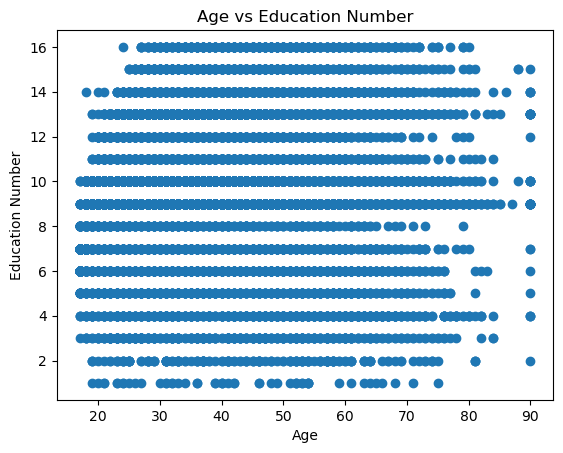

In [19]:
# Objective: Examine the relationship between age and education-num using a scatter plot
plt.scatter(data['age'], data['education-num'])
plt.xlabel('Age')
plt.ylabel('Education Number')
plt.title('Age vs Education Number')
plt.show()

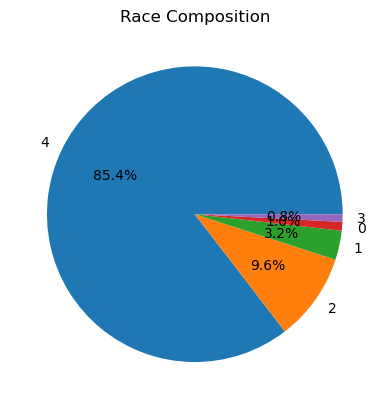

In [20]:
# Objective: Illustrate the proportion of different races using a pie chart
plt.pie(data['race'].value_counts().values, labels=data['race'].value_counts().index, autopct='%1.1f%%')
plt.title('Race Composition')
plt.show()

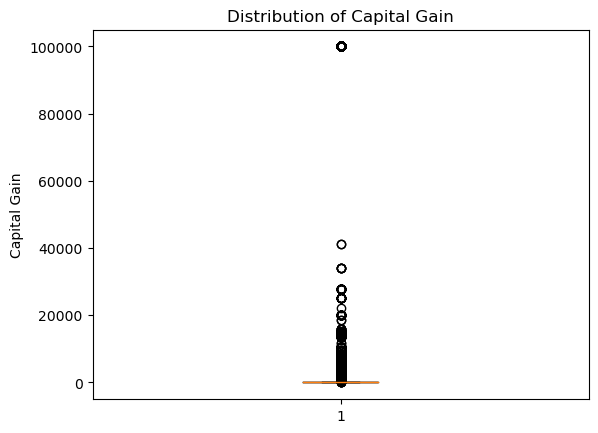

In [21]:
# Objective: Display the distribution and identify outliers in capital-gain using a box plot
plt.boxplot(data['capital-gain'])
plt.ylabel('Capital Gain')
plt.title('Distribution of Capital Gain')
plt.show()

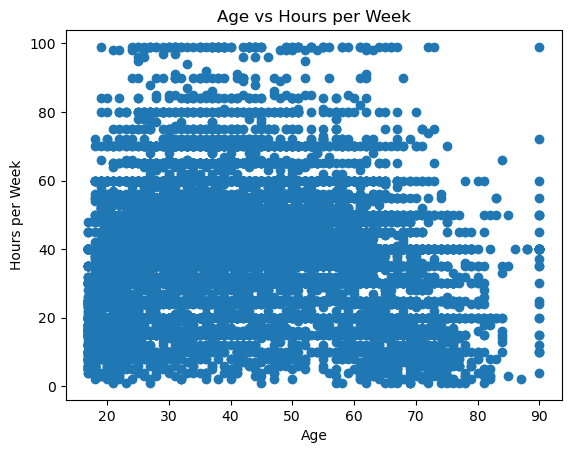

In [22]:
# Objective: Visualize the relationship between age and hours-per-week using a scatter plot
plt.scatter(data['age'], data['hours-per-week'])
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Age vs Hours per Week')
plt.show()

In [ ]:
#pie

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

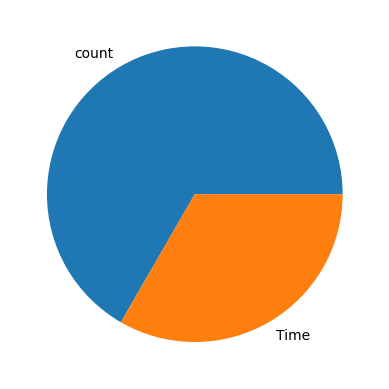

In [25]:
col=['count','Time']
cnt=[240,120]
mat.pie(cnt,labels=col)
mat.show()

In [26]:
#hist

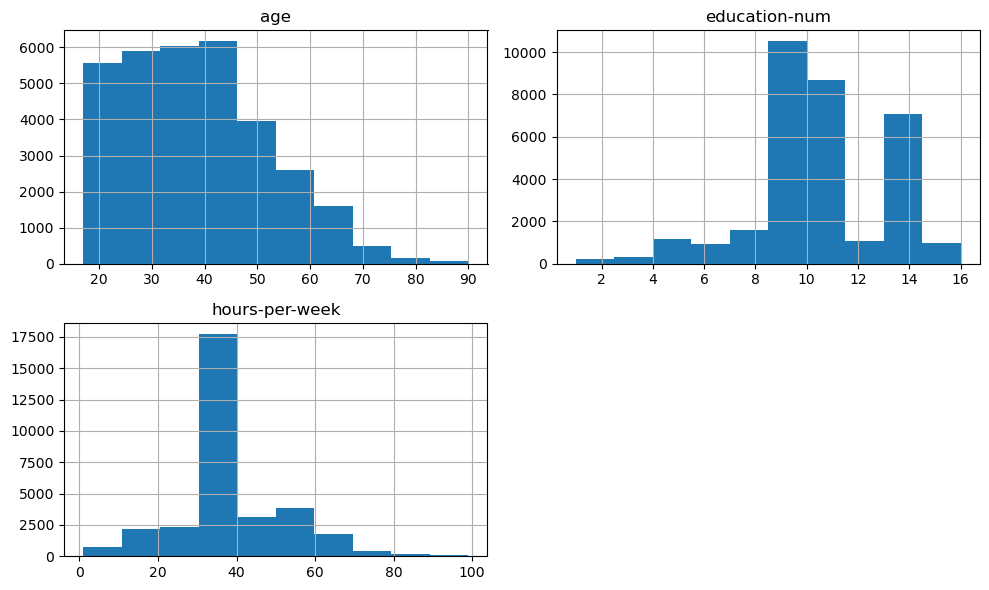

In [29]:
col=['age','education-num','hours-per-week']
df[col].hist(bins=10,figsize=(10,6))
mat.tight_layout()
mat.show()

In [30]:
#box

[]

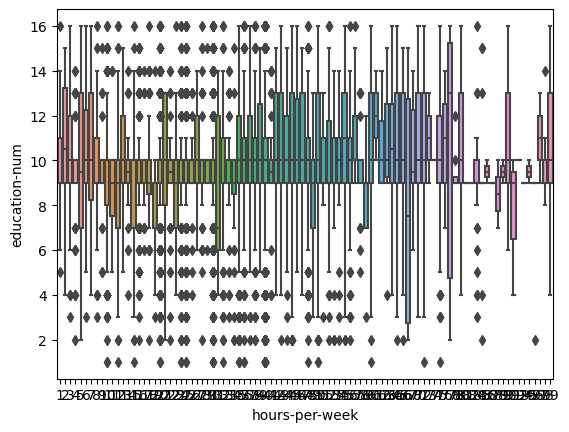

In [31]:
sns.boxplot(data=df,x='hours-per-week',y='education-num')
mat.plot()

In [32]:
#scatter

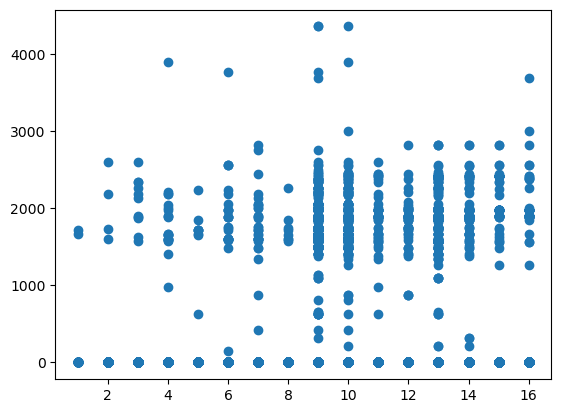

In [33]:
mat.scatter(data=df,x='education-num',y='capital-loss')
mat.show()

In [34]:
#bar

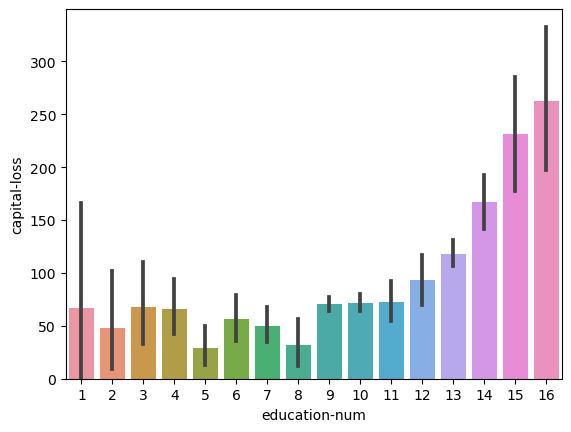

In [35]:
sns.barplot(data=df,x='education-num',y='capital-loss')
mat.show()

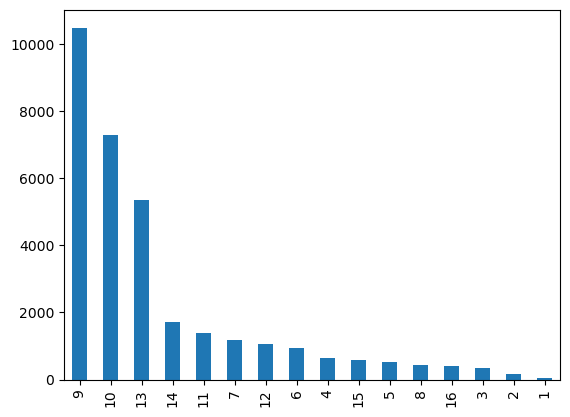

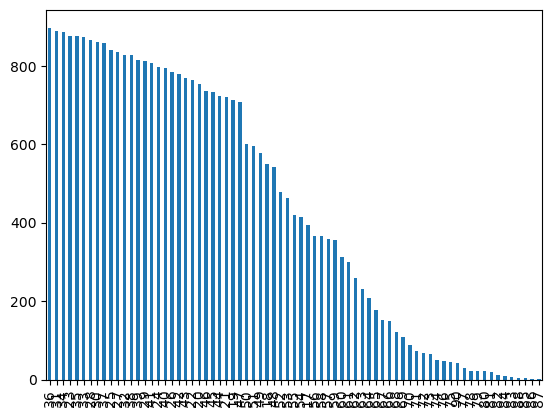

In [36]:
col=['education-num','age']
for i in col:
    df[i].value_counts().plot(kind='bar')
    mat.show()